### Readme
notebook que carga y analiza el fichero JSON con información de repositorios
los datos se han obtenido via API GraphQL y REST API de github

### Carga de librerías y fichero de datos. comprobaciones básicas

In [1]:
# imports de librerías requeridas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import json
from tabulate import tabulate
import locale

In [2]:
#pd.set_option('display.precision', 2)  # Configurar la precisión de decimales

# Configurar la visualización para que los números se muestren en formato europeo
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x).replace(',', 'X').replace('.', ',').replace('X', '.'))

In [3]:
DATA_FILE='D:\\Dev\\github-scrapping-02\\Data\\df_clean.json'

# Fichero df_clean.sjon contenia fechas en formato UNIX seconds. Se convirtió a DateTime de nuevo en el siguiente fichero
#DATA_FILE='D:\\Dev\\github-scrapping-02\\Data\\df_clean_w_correct_date.json'

In [4]:
# Leer el archivo JSON y convertir las columnas de fecha
df = pd.read_json(DATA_FILE, orient='records', lines=True, convert_dates=['createdAt', 'pushedAt', 'updatedAt'])

In [5]:
df_copy=df.copy()

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37120 entries, 0 to 37119
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    37120 non-null  object        
 1   description             35030 non-null  object        
 2   stargazerCount          37120 non-null  int64         
 3   forkCount               37120 non-null  int64         
 4   createdAt               37120 non-null  datetime64[ns]
 5   updatedAt               37120 non-null  datetime64[ns]
 6   pushedAt                37120 non-null  datetime64[ns]
 7   diskUsage               37120 non-null  int64         
 8   isArchived              37120 non-null  bool          
 9   isEmpty                 37120 non-null  bool          
 10  isFork                  37120 non-null  bool          
 11  isInOrganization        37120 non-null  bool          
 12  isPrivate               37120 non-null  bool  

In [7]:
# Definición de las columnas numéricas y categóricas según la estructura de df_copy
# son las varialbes seleccionadas en E3

columnas_numericas = [
    'assignableUsers',
    'contributors',
    'deployments',
    'diskUsage',
    'environments',
    'milestones',
    'releases',
    'language_count'
]

# Definición de columnas categóricas
columnas_categoricas = [
    'hasIssuesEnabled',
    'hasProjectsEnabled',
    'hasSponsorshipsEnabled',
    'hasWikiEnabled',
    'isInOrganization',
    'isTemplate'
]

lennum=len(columnas_numericas)
lencat=len(columnas_categoricas)
# Mostrar los resultados
print("Columnas Numéricas:")
print(lennum, columnas_numericas)
print("\nColumnas Categóricas:")
print(lencat, columnas_categoricas)
print("total: ",lennum+lencat)


Columnas Numéricas:
8 ['assignableUsers', 'contributors', 'deployments', 'diskUsage', 'environments', 'milestones', 'releases', 'language_count']

Columnas Categóricas:
6 ['hasIssuesEnabled', 'hasProjectsEnabled', 'hasSponsorshipsEnabled', 'hasWikiEnabled', 'isInOrganization', 'isTemplate']
total:  14


In [8]:
# convertir booleans a numéricas

# Convertimos directamente las columnas booleanas a numéricas
df_m = df_copy.copy()

df_m[columnas_categoricas] = df_m[columnas_categoricas].astype(int)

# Nos quedamos solo con las columnas numéricas y categóricas transformadas
df_m = df_m[columnas_numericas + columnas_categoricas]

# Mostrar el dataframe resultante
df_m.head()

,assignableUsers,contributors,deployments,diskUsage,environments,milestones,releases,language_count,hasIssuesEnabled,hasProjectsEnabled,hasSponsorshipsEnabled,hasWikiEnabled,isInOrganization,isTemplate
0,4,22,0,55148,0,0,26,5,1,1,0,1,1,0
1,1,15,0,9068,0,0,4,2,1,1,1,1,0,0
2,4,4,0,548,0,0,4,2,1,1,0,1,1,0
3,1,11,100,310,2,0,1,2,1,1,1,1,1,0
4,1,10,0,8118,0,0,0,4,1,1,0,0,0,0


In [9]:
columnas=df_m.columns
print(len(columnas))

14


In [10]:
df_m.describe()

,assignableUsers,contributors,deployments,diskUsage,environments,milestones,releases,language_count,hasIssuesEnabled,hasProjectsEnabled,hasSponsorshipsEnabled,hasWikiEnabled,isInOrganization,isTemplate
count,"37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00"
mean,"12,56","9,35","70,11","54.013,99","0,66","0,68","10,18","3,13","0,98","0,86","0,11","0,82","0,34","0,01"
std,"127,56","16,72","1.780,88","1.031.953,50","34,54","4,37","41,43","2,25","0,15","0,35","0,32","0,39","0,47","0,11"
min,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","1,00","0,00","0,00","0,00","0,00","0,00","0,00"
25%,"1,00","1,00","0,00","475,00","0,00","0,00","0,00","1,00","1,00","1,00","0,00","1,00","0,00","0,00"
50%,"1,00","3,00","0,00","2.931,00","0,00","0,00","0,00","2,00","1,00","1,00","0,00","1,00","0,00","0,00"
75%,"3,00","9,00","0,00","16.806,00","0,00","0,00","6,00","4,00","1,00","1,00","0,00","1,00","1,00","0,00"
max,"2.267,00","100,00","287.890,00","105.078.627,00","5.262,00","229,00","1.000,00","10,00","1,00","1,00","1,00","1,00","1,00","1,00"


## Estandarizar a rango [0,1]

In [11]:
# se aplica Min-Max para mantener la proporción relatvia entre los datos sin modificar distribución

from sklearn.preprocessing import MinMaxScaler

# Normalizar los datos y guardar en el mismo DataFrame
scaler = MinMaxScaler()
df_m[columnas] = scaler.fit_transform(df_m[columnas])

In [12]:
df_m.describe()

,assignableUsers,contributors,deployments,diskUsage,environments,milestones,releases,language_count,hasIssuesEnabled,hasProjectsEnabled,hasSponsorshipsEnabled,hasWikiEnabled,isInOrganization,isTemplate
count,"37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00"
mean,"0,01","0,09","0,00","0,00","0,00","0,00","0,01","0,24","0,98","0,86","0,11","0,82","0,34","0,01"
std,"0,06","0,17","0,01","0,01","0,01","0,02","0,04","0,25","0,15","0,35","0,32","0,39","0,47","0,11"
min,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
25%,"0,00","0,01","0,00","0,00","0,00","0,00","0,00","0,00","1,00","1,00","0,00","1,00","0,00","0,00"
50%,"0,00","0,03","0,00","0,00","0,00","0,00","0,00","0,11","1,00","1,00","0,00","1,00","0,00","0,00"
75%,"0,00","0,09","0,00","0,00","0,00","0,00","0,01","0,33","1,00","1,00","0,00","1,00","1,00","0,00"
max,"1,00","1,00","1,00","1,00","1,00","1,00","1,00","1,00","1,00","1,00","1,00","1,00","1,00","1,00"


## Relación entre variables


In [13]:
# Hay relaciones no lineales en los datos?
# A mayor coef spearman, mayor fuerza de la relación. Si es valor alto puede indicar relación monótona (no lineal)
# Pero se deben ejecutar otras pruebas de linealidad (siguiente celda)
# Listado ordenado por Spearman, sin repetir combinación de variables

from scipy.stats import spearmanr

# Crear una lista para almacenar los resultados
resultado_spearman = []

# Calcular la correlación de Spearman sin repetir combinaciones
for i in range(len(columnas)):
    for j in range(i + 1, len(columnas)):
        var1 = columnas[i]
        var2 = columnas[j]
        corr, _ = spearmanr(df_m[var1], df_m[var2])
        resultado_spearman.append({'Variable 1': var1, 'Variable 2': var2, 'Correlación de Spearman': corr})

# Convertir la lista de resultados a un DataFrame
resultado_spearman_df = pd.DataFrame(resultado_spearman)

# Ordenar el DataFrame
resultado_spearman_df = resultado_spearman_df.sort_values(by='Variable 1')

# Configuración para mostrar la tabla completa
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

# Mostrar resultados ordenados
print(resultado_spearman_df)



                Variable 1              Variable 2  Correlación de Spearman
0          assignableUsers            contributors                     0,52
12         assignableUsers              isTemplate                     0,00
11         assignableUsers        isInOrganization                     0,64
10         assignableUsers          hasWikiEnabled                    -0,14
9          assignableUsers  hasSponsorshipsEnabled                    -0,03
7          assignableUsers        hasIssuesEnabled                    -0,01
8          assignableUsers      hasProjectsEnabled                    -0,09
5          assignableUsers                releases                     0,20
4          assignableUsers              milestones                     0,24
3          assignableUsers            environments                     0,13
2          assignableUsers               diskUsage                     0,20
1          assignableUsers             deployments                     0,13
6          a

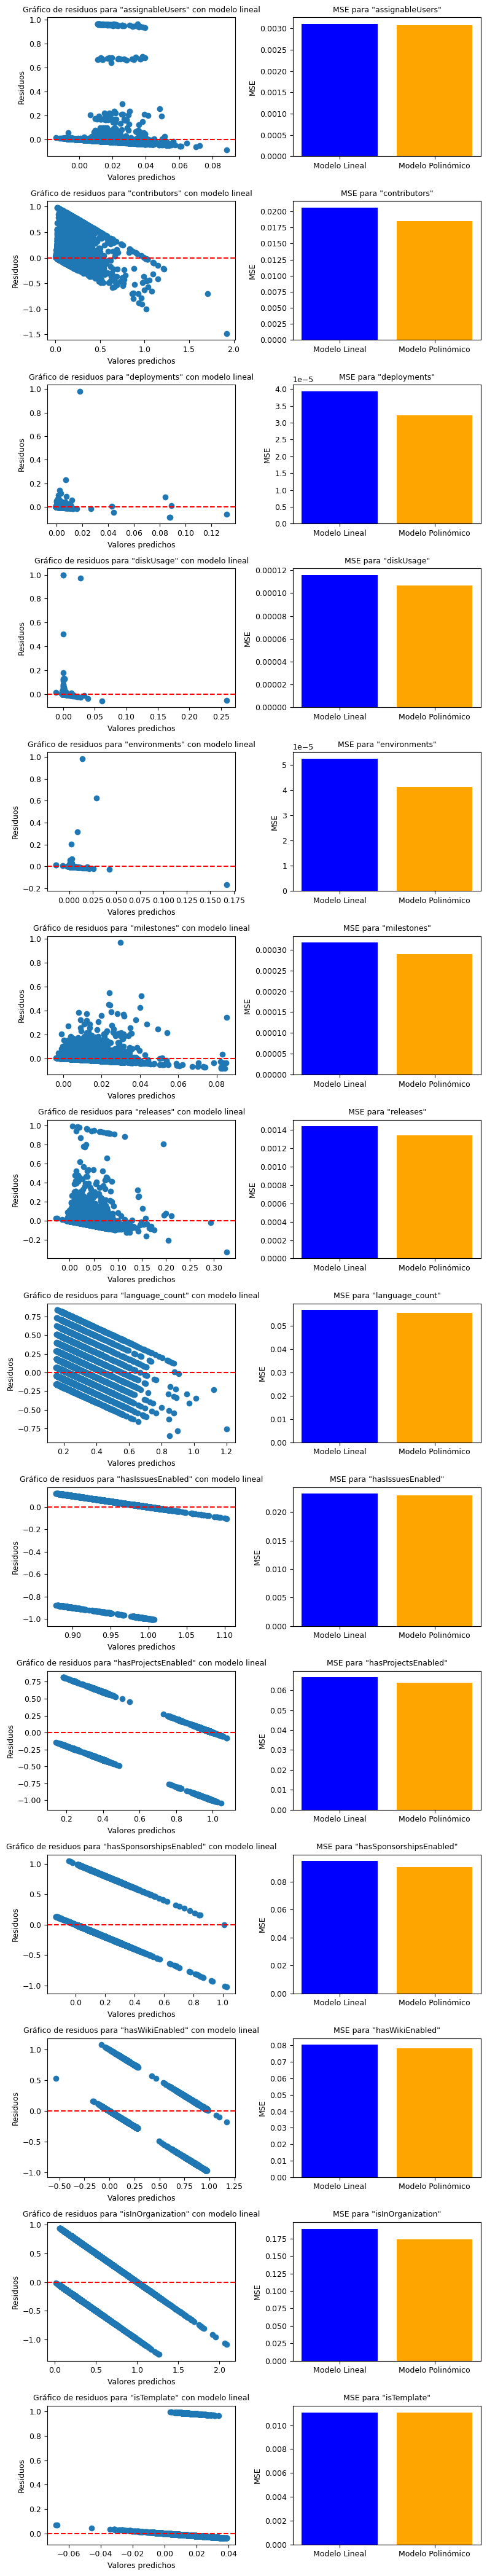

In [14]:
# 2 Pruebas de linealidad para averiguar tipo de relación
# Análisis de residuos con reg lineal
# Aplicar modelos polinómicos
# Gráficos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Ajustar el tamaño de la fuente globalmente
plt.rcParams.update({'font.size': 9})

# Crear una figura para los gráficos en un grid de 2 columnas
fig, axes = plt.subplots(nrows=len(columnas), ncols=2, figsize=(8, 3 * len(columnas)))

# Almacenar las conclusiones para la tabla final
tabla_resultados = []

# Iterar sobre cada variable en "columnas" como variable objetivo
for idx, target in enumerate(columnas):
    # Asignar la variable objetivo
    y = df_m[target]
    
    # Definir X excluyendo la variable objetivo
    X = df_m[columnas].drop(columns=[target])

    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Ajustar un modelo lineal
    model_linear = LinearRegression()
    model_linear.fit(X_train, y_train)

    # Predecir
    y_pred_linear = model_linear.predict(X_train)

    # Calcular residuos
    residuos = y_train - y_pred_linear

    # Graficar residuos
    ax = axes[idx, 0]  # Seleccionar el eje correspondiente
    ax.scatter(y_pred_linear, residuos)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_title(f'Gráfico de residuos para "{target}" con modelo lineal', fontsize=9)
    ax.set_xlabel('Valores predichos', fontsize=9)
    ax.set_ylabel('Residuos', fontsize=9)

    # Conclusión del análisis de residuos (¿hay patrón?)
    patron = "sí" if np.any(np.abs(residuos) > 0) else "no"

    # Transformación polinómica
    poly = PolynomialFeatures(degree=2)  # Ajustar a un modelo cuadrático
    X_poly = poly.fit_transform(X_train)

    # Ajustar un modelo polinómico
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_train)

    # Predecir y evaluar
    y_pred_poly = model_poly.predict(X_poly)
    mse_poly = mean_squared_error(y_train, y_pred_poly)

    # Comparar con el modelo lineal
    mse_linear = mean_squared_error(y_train, y_pred_linear)

    # Graficar comparación MSE
    ax = axes[idx, 1]  # Seleccionar el eje correspondiente
    ax.bar(['Modelo Lineal', 'Modelo Polinómico'], [mse_linear, mse_poly], color=['blue', 'orange'])
    ax.set_title(f'MSE para "{target}"', fontsize=9)
    ax.set_ylabel('MSE', fontsize=9)

# Ajustar el layout
plt.tight_layout()
plt.show()


In [15]:
# 2 Pruebas de linealidad para averiguar tipo de relación
# Análisis de residuos con reg lineal
# Aplicar modelos polinómicos
# Tabla cuantitativa

# Crear tabla de resultados
# Almacenar las conclusiones para la tabla final
tabla_resultados = []

# Iterar sobre cada variable en "columnas" como variable objetivo
for idx, target in enumerate(columnas):
    # Asignar la variable objetivo
    y = df_m[target]
    
    # Definir X excluyendo la variable objetivo
    X = df_m[columnas].drop(columns=[target])

    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Ajustar un modelo lineal
    model_linear = LinearRegression()
    model_linear.fit(X_train, y_train)

    # Predecir
    y_pred_linear = model_linear.predict(X_train)

    # Calcular residuos
    residuos = y_train - y_pred_linear

    # Cálculo del promedio de residuos
    promedio_residuos = np.mean(residuos)

    # Conclusión del análisis de residuos (¿hay patrón?)
    patron = "sí" if np.any(np.abs(residuos) > 0) else "no"

    # Transformación polinómica
    poly = PolynomialFeatures(degree=2)  # Ajustar a un modelo cuadrático
    X_poly = poly.fit_transform(X_train)

    # Ajustar un modelo polinómico
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_train)

    # Predecir y evaluar
    y_pred_poly = model_poly.predict(X_poly)
    mse_poly = mean_squared_error(y_train, y_pred_poly)

    # Comparar con el modelo lineal
    mse_linear = mean_squared_error(y_train, y_pred_linear)

    # Determinar recomendación
    if patron == "sí":
        # Si hay patrón en los residuos, puede que el modelo lineal no sea adecuado
        recomendacion = "poli." if (mse_poly < mse_linear) else "lineal"
    else:
        # Si no hay patrón en los residuos, se puede recomendar el modelo lineal
        recomendacion = "lineal"

    # Guardar resultados en la tabla
    tabla_resultados.append({
        "variable": target,
        "promedio residuos": f"{promedio_residuos:.3f}".replace('.', ','),  # Se incluye el promedio de residuos
        "MSE lineal": f"{mse_linear:.3f}".replace('.', ','),
        "MSE poli.": f"{mse_poly:.3f}".replace('.', ','),
        "patrón": patron,
        "recomendación": recomendacion
    })

# Convertir los resultados a un DataFrame y mostrar la tabla
tabla_resultados_df = pd.DataFrame(tabla_resultados)

# Mostrar la tabla final
print(tabla_resultados_df)


                  variable promedio residuos MSE lineal MSE poli. patrón  \
0          assignableUsers            -0,000      0,003     0,003     sí   
1             contributors            -0,000      0,021     0,018     sí   
2              deployments            -0,000      0,000     0,000     sí   
3                diskUsage             0,000      0,000     0,000     sí   
4             environments             0,000      0,000     0,000     sí   
5               milestones             0,000      0,000     0,000     sí   
6                 releases            -0,000      0,001     0,001     sí   
7           language_count             0,000      0,057     0,055     sí   
8         hasIssuesEnabled            -0,000      0,023     0,023     sí   
9       hasProjectsEnabled            -0,000      0,066     0,064     sí   
10  hasSponsorshipsEnabled            -0,000      0,095     0,090     sí   
11          hasWikiEnabled            -0,000      0,080     0,078     sí   
12        is

### PCA

In [16]:
# varianza de componentes PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Crear una instancia de PCA con el número de componentes deseados
n_components = min(df_m.shape)  # Elegir el número de componentes como el menor entre filas y columnas
pca = PCA(n_components=n_components)

# Ajustar y transformar los datos
X_pca = pca.fit_transform(df_m)

# Imprimir la proporción de varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)

# Imprimir la suma acumulativa de varianza explicada
print("Varianza acumulativa explicada:", sum(pca.explained_variance_ratio_))

# Crear un DataFrame de componentes principales para visualización
df_pca = pd.DataFrame(data=X_pca, columns=[f'Componente {i+1}' for i in range(n_components)])

# Mostrar las primeras filas del DataFrame de componentes principales
# print(df_pca.head())

# Enumerar los componentes más interesantes
varianza_explicada = pca.explained_variance_ratio_
componentes_interesantes = sorted(enumerate(varianza_explicada), key=lambda x: x[1], reverse=True)

print("\nComponentes más interesantes (de más a menos):")
for idx, varianza in componentes_interesantes:
    print(f'Componente {idx + 1}: Varianza Explicada = {varianza:.4f}')

# Obtener las cargas de los componentes
cargas_componentes = pd.DataFrame(pca.components_, columns=df_m.columns)

# Asegurarse de que las cargas se mantengan como float
cargas_componentes = cargas_componentes.astype(float)

# Añadir la varianza explicada al DataFrame de cargas
cargas_componentes['Varianza Explicada'] = varianza_explicada

# Añadir un índice que identifique los componentes
cargas_componentes.index = [f'Componente {i+1}' for i in range(len(cargas_componentes))]

# Mostrar las cargas de los componentes con la varianza explicada
print("Cargas de los Componentes con Varianza Explicada:\n", cargas_componentes)


Varianza explicada por cada componente principal: [3.71810787e-01 2.68932208e-01 1.30898486e-01 8.36847030e-02
 6.07741123e-02 3.16402765e-02 2.99329262e-02 1.52644209e-02
 4.27399037e-03 2.09301426e-03 4.50622145e-04 1.34458965e-04
 6.36586464e-05 4.63356158e-05]
Varianza acumulativa explicada: 1.0000000000000002

Componentes más interesantes (de más a menos):
Componente 1: Varianza Explicada = 0.3718
Componente 2: Varianza Explicada = 0.2689
Componente 3: Varianza Explicada = 0.1309
Componente 4: Varianza Explicada = 0.0837
Componente 5: Varianza Explicada = 0.0608
Componente 6: Varianza Explicada = 0.0316
Componente 7: Varianza Explicada = 0.0299
Componente 8: Varianza Explicada = 0.0153
Componente 9: Varianza Explicada = 0.0043
Componente 10: Varianza Explicada = 0.0021
Componente 11: Varianza Explicada = 0.0005
Componente 12: Varianza Explicada = 0.0001
Componente 13: Varianza Explicada = 0.0001
Componente 14: Varianza Explicada = 0.0000
Cargas de los Componentes con Varianza Expl

In [17]:
cargas_componentes.head(30)

,assignableUsers,contributors,deployments,diskUsage,environments,milestones,releases,language_count,hasIssuesEnabled,hasProjectsEnabled,hasSponsorshipsEnabled,hasWikiEnabled,isInOrganization,isTemplate,Varianza Explicada
Componente 1,"0,01","0,12","0,00","0,00","0,00","0,01","0,01","0,10","-0,05","-0,44","0,10","-0,55","0,68","0,00","0,37"
Componente 2,"0,01","0,05","0,00","0,00","0,00","0,00","0,00","0,10","0,05","0,45","-0,24","0,48","0,70","-0,01","0,27"
Componente 3,"-0,00","0,08","0,00","0,00","0,00","0,00","0,02","0,13","0,04","0,17","0,95","0,16","0,07","0,01","0,13"
Componente 4,"0,01","0,19","0,00","0,00","0,00","0,01","0,02","0,95","-0,02","0,03","-0,13","-0,05","-0,18","0,01","0,08"
Componente 5,"-0,00","0,02","0,00","-0,00","0,00","0,00","-0,00","-0,07","0,04","0,75","-0,02","-0,66","-0,03","-0,00","0,06"
Componente 6,"0,01","0,61","0,00","0,00","0,00","0,02","0,05","-0,13","0,78","-0,06","-0,05","0,01","-0,06","-0,02","0,03"
Componente 7,"0,02","0,75","0,00","0,00","0,00","0,02","0,05","-0,18","-0,62","0,05","-0,02","0,06","-0,07","-0,02","0,03"
Componente 8,"-0,00","0,02","-0,00","-0,00","0,00","-0,00","-0,01","-0,02","0,01","0,01","-0,01","0,00","-0,00","1,00","0,02"
Componente 9,"1,00","-0,02","-0,00","-0,00","-0,00","0,00","-0,01","-0,00","0,00","0,00","0,01","-0,00","-0,01","0,00","0,00"
Componente 10,"0,01","-0,07","0,01","-0,00","0,00","0,07","0,99","-0,01","-0,01","0,00","-0,01","0,00","-0,00","0,01","0,00"


In [18]:

# Guardar el DataFrame en un archivo CSV con el formato europeo
cargas_componentes.to_csv('cargas_componentes.csv', index=True)


In [19]:
varianza_explicada

array([3.71810787e-01, 2.68932208e-01, 1.30898486e-01, 8.36847030e-02,
       6.07741123e-02, 3.16402765e-02, 2.99329262e-02, 1.52644209e-02,
       4.27399037e-03, 2.09301426e-03, 4.50622145e-04, 1.34458965e-04,
       6.36586464e-05, 4.63356158e-05])

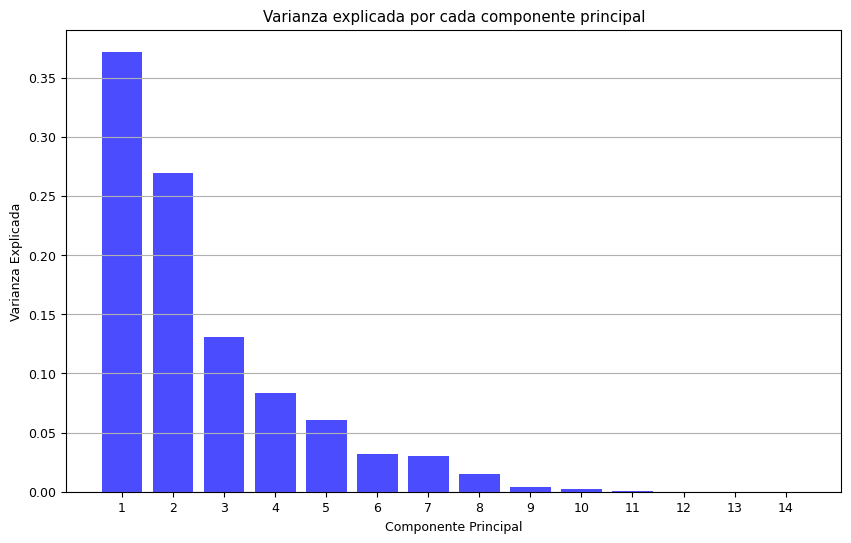

In [20]:
# Crear un gráfico de barras de las varianzas explicadas
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.7, color='blue')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza explicada por cada componente principal')
plt.xticks(range(1, len(varianza_explicada) + 1))
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()

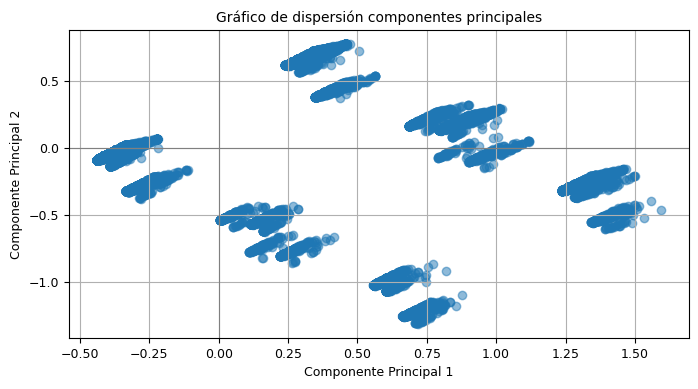

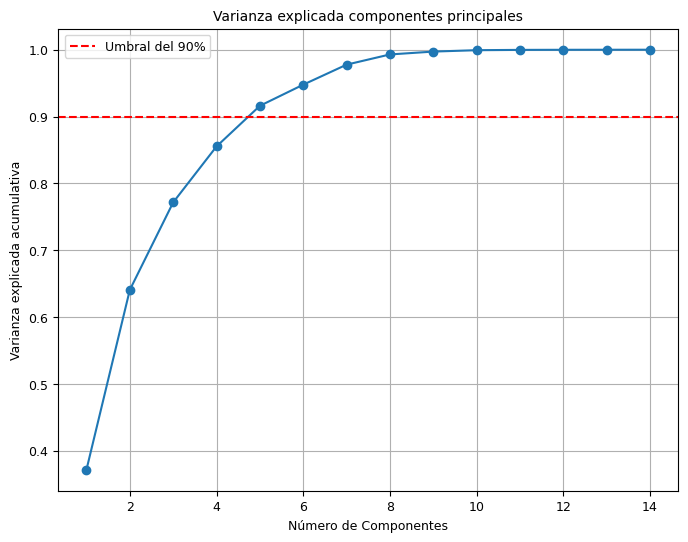

In [21]:
# probando a visualziar algo significativo

# Gráfico de dispersión de los dos primeros componentes principales
plt.figure(figsize=(8, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)  # X_pca e dataframe con los PCAs
plt.xlabel('Componente Principal 1', fontsize=9)
plt.ylabel('Componente Principal 2', fontsize=9)
plt.title('Gráfico de dispersión componentes principales', fontsize=10)
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.grid()
plt.show()

# Gráfico de varianza explicada acumulativa
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Número de Componentes', fontsize=9)
plt.ylabel('Varianza explicada acumulativa', fontsize=9)
plt.title('Varianza explicada componentes principales', fontsize=10)
plt.axhline(y=0.90, color='r', linestyle='--', label='Umbral del 90%')
plt.legend(fontsize=9)
plt.grid()
plt.show()



In [22]:
cargas_componentes.head()

,assignableUsers,contributors,deployments,diskUsage,environments,milestones,releases,language_count,hasIssuesEnabled,hasProjectsEnabled,hasSponsorshipsEnabled,hasWikiEnabled,isInOrganization,isTemplate,Varianza Explicada
Componente 1,"0,01","0,12","0,00","0,00","0,00","0,01","0,01","0,10","-0,05","-0,44","0,10","-0,55","0,68","0,00","0,37"
Componente 2,"0,01","0,05","0,00","0,00","0,00","0,00","0,00","0,10","0,05","0,45","-0,24","0,48","0,70","-0,01","0,27"
Componente 3,"-0,00","0,08","0,00","0,00","0,00","0,00","0,02","0,13","0,04","0,17","0,95","0,16","0,07","0,01","0,13"
Componente 4,"0,01","0,19","0,00","0,00","0,00","0,01","0,02","0,95","-0,02","0,03","-0,13","-0,05","-0,18","0,01","0,08"
Componente 5,"-0,00","0,02","0,00","-0,00","0,00","0,00","-0,00","-0,07","0,04","0,75","-0,02","-0,66","-0,03","-0,00","0,06"


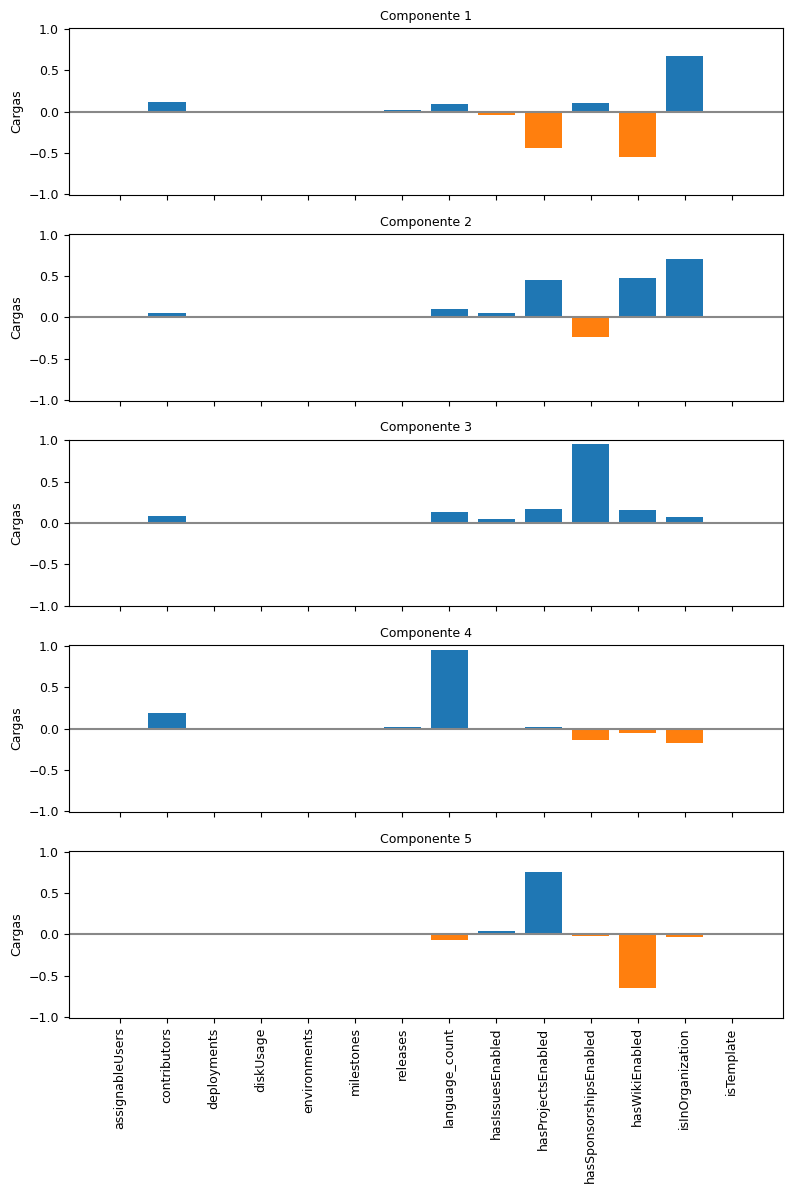

In [23]:
# visualización de componentes
# Visualizar la carga según el tipo de gráfico en Practical Statistics for Data Scientists


# Obtener las cargas de los componentes
loadings = cargas_componentes.iloc[:, :-1]  # Excluir la columna de 'Varianza Explicada'

# Verificar si hay valores no válidos en las cargas
if loadings.isnull().values.any() or np.isinf(loadings.values).any():
    print("Se encontraron valores NaN o Inf en las cargas. Se reemplazarán por 0.")
    loadings = loadings.fillna(0)  # Reemplazar NaN con 0
    loadings.replace([np.inf, -np.inf], 0, inplace=True)  # Reemplazar Inf y -Inf con 0

# Obtener el máximo valor absoluto de las cargas para escalar el gráfico
maxPC = 1.01 * np.max(np.abs(loadings))

# Crear una figura con subgráficos para visualizar las cargas
n_componentes_visualizar = 5  # Número de componentes a visualizar
f, axes = plt.subplots(n_componentes_visualizar, 1, figsize=(8, 12), sharex=True)

# Iterar sobre cada componente principal para visualizar sus cargas
for i, ax in enumerate(axes):
    pc_loadings = loadings.iloc[i, :]  # Cargas del componente principal i
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]  # Asignar colores según el signo de la carga
    ax.axhline(color='#888888')  # Línea base en y=0
    bars = ax.bar(loadings.columns, pc_loadings, color=colors)  # Crear un gráfico de barras para las cargas
    ax.set_ylim([-maxPC, maxPC])  # Ajustar el rango del eje y para hacer el gráfico simétrico
    ax.set_title(f'Componente {i+1}', fontsize=9)

    # Etiquetas para los ejes
    ax.set_ylabel('Cargas', fontsize=9)  # Etiqueta para el eje Y

    # Ajustar el tamaño de fuente de los ticks
    ax.tick_params(axis='both', which='major', labelsize=9)  # Ajustar el tamaño de los ticks

    # Establecer las posiciones de los ticks y las etiquetas rotadas
    labels = [col.replace('totalCount', '') for col in loadings.columns]  # Eliminar "totalCount"
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=90)

# Ajustar la disposición de los subgráficos
plt.tight_layout()
plt.show()





In [24]:
# Verificar las medias de los componentes principales
print("Media de los componentes principales:", X_pca.mean(axis=0))


Media de los componentes principales: [ 2.07269546e-18 -1.00554144e-16  2.83687106e-18  9.01009392e-19
  6.12462069e-18 -3.11562318e-17  2.14896348e-17 -3.43159334e-19
  1.33640185e-18 -7.94148883e-19 -2.00285322e-19  1.69689907e-19
 -1.87565954e-19  5.77760443e-20]


In [25]:
# Imprimir las cargas del primer componente
print("Cargas del Componente Principal 1:")
print(cargas_componentes.iloc[0])  # El primer componente está en la primera fila

Cargas del Componente Principal 1:
assignableUsers           0,01
contributors              0,12
deployments               0,00
diskUsage                 0,00
environments              0,00
milestones                0,01
releases                  0,01
language_count            0,10
hasIssuesEnabled         -0,05
hasProjectsEnabled       -0,44
hasSponsorshipsEnabled    0,10
hasWikiEnabled           -0,55
isInOrganization          0,68
isTemplate                0,00
Varianza Explicada        0,37
Name: Componente 1, dtype: float64


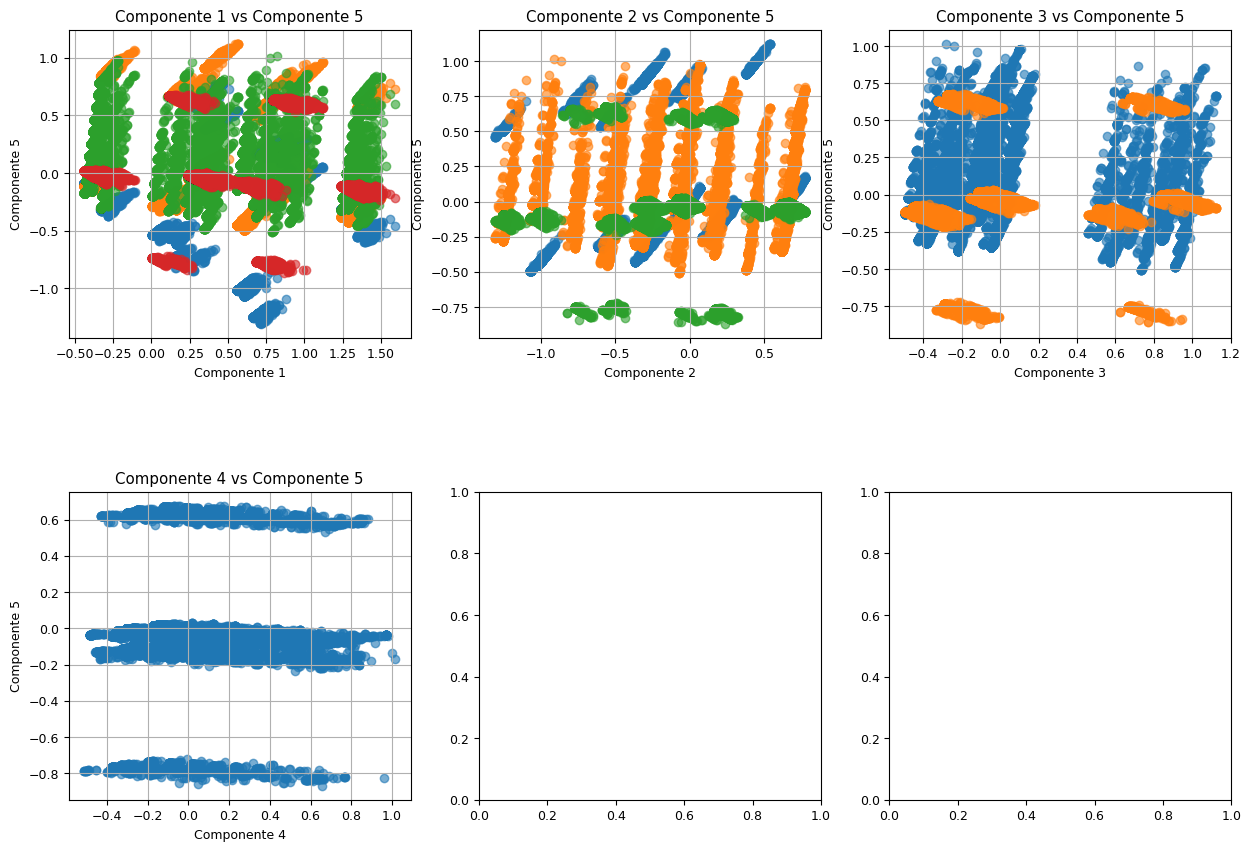

In [28]:
# Visualizar componentes entre si
# solo los primeros significativos

# Crear un DataFrame para los componentes principales
df_pca = pd.DataFrame(data=X_pca, columns=[f'Componente {i + 1}' for i in range(X_pca.shape[1])])

# Definir el número de componentes a visualizar
n_componentes = 5  # Solo se visualizarán los primeros 5 componentes

# Crear el grid de subgráficas
fig, axs = plt.subplots(nrows=int(np.ceil(n_componentes / 3)), ncols=3, figsize=(15, 5 * int(np.ceil(n_componentes / 3))))

# Ajustar el layout
plt.subplots_adjust(hspace=0.5)

# Graficar cada par de componentes
for i in range(n_componentes):
    for j in range(i + 1, n_componentes):
        row = i // 3  # Determinar la fila
        col = i % 3   # Determinar la columna
        axs[row, col].scatter(df_pca.iloc[:, i], df_pca.iloc[:, j], alpha=0.6)
        axs[row, col].set_xlabel(f'Componente {i + 1}')
        axs[row, col].set_ylabel(f'Componente {j + 1}')
        axs[row, col].set_title(f'Componente {i + 1} vs Componente {j + 1}')
        axs[row, col].grid(True)

# Eliminar las subgráficas vacías si hay alguna
#for idx in range(n_componentes * (n_componentes - 1) // 2, len(axs.flatten())):
#    fig.delaxes(axs.flatten()[idx])

plt.show()

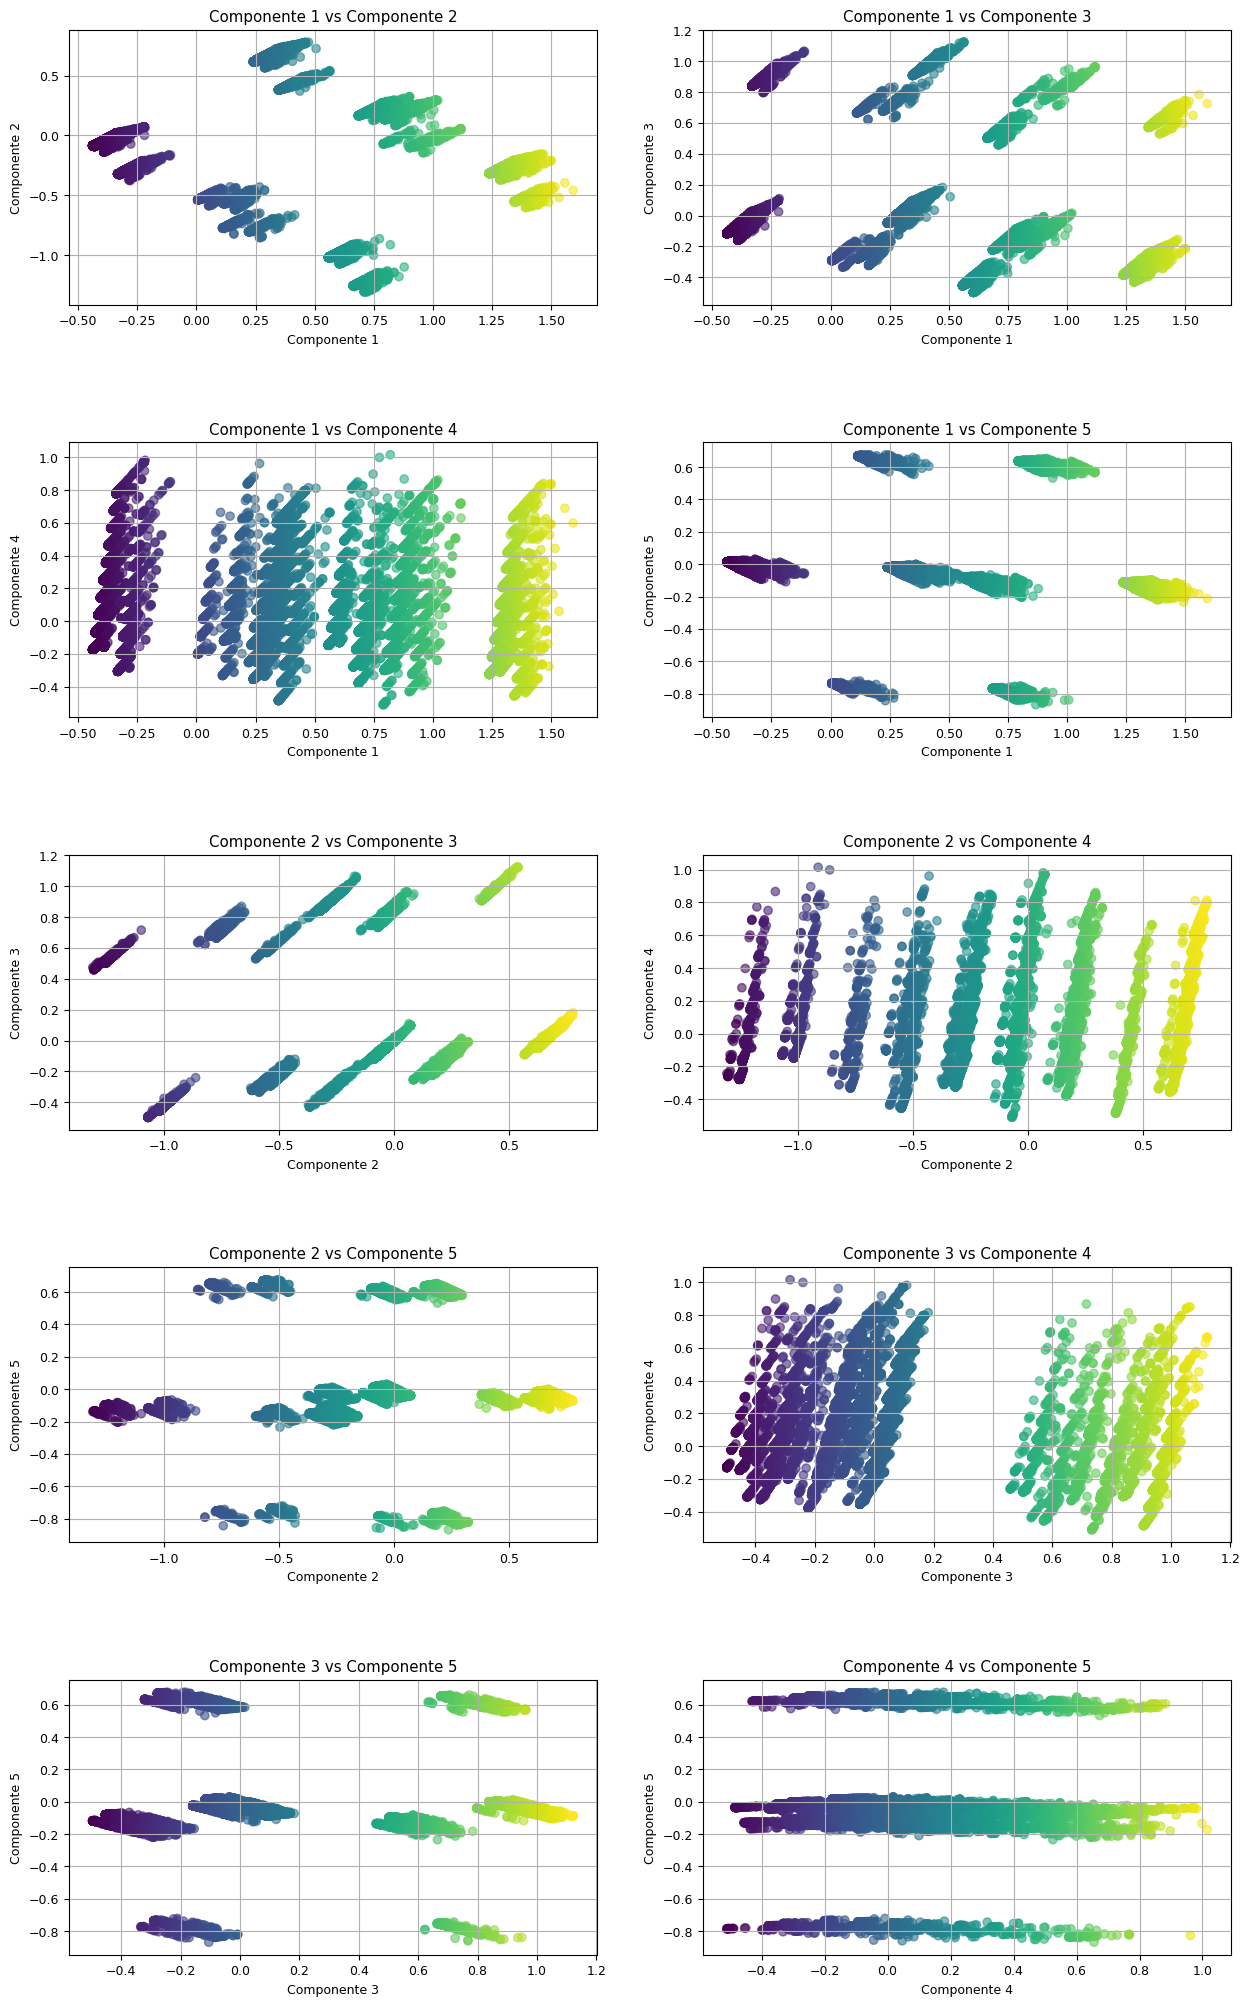

In [29]:
# Visualizar componentes entre sí

# Crear un DataFrame para los componentes principales
df_pca = pd.DataFrame(data=X_pca, columns=[f'Componente {i + 1}' for i in range(X_pca.shape[1])])

# Definir el número de componentes a visualizar
n_componentes = 5  # Solo se visualizarán los primeros 5 componentes

# Crear el grid de subgráficas con 2 columnas
fig, axs = plt.subplots(nrows=int(np.ceil(n_componentes * (n_componentes - 1) / 2 / 2)), ncols=2, figsize=(15, 5 * int(np.ceil(n_componentes * (n_componentes - 1) / 2 / 2))))

# Ajustar el layout
plt.subplots_adjust(hspace=0.5)

# Graficar cada par de componentes sin repeticiones
index = 0
for i in range(n_componentes):
    for j in range(i + 1, n_componentes):
        row = index // 2  # Determinar la fila
        col = index % 2   # Determinar la columna
        scatter = axs[row, col].scatter(df_pca.iloc[:, i], df_pca.iloc[:, j], alpha=0.6, c=df_pca.iloc[:, i], cmap='viridis')  # Usar un esquema de color
        axs[row, col].set_xlabel(f'Componente {i + 1}')
        axs[row, col].set_ylabel(f'Componente {j + 1}')
        axs[row, col].set_title(f'Componente {i + 1} vs Componente {j + 1}')
        axs[row, col].grid(True)
        
        # Añadir una barra de color
        #plt.colorbar(scatter, ax=axs[row, col], label='Color Scale')

        index += 1

# Eliminar las subgráficas vacías si hay alguna
for idx in range(index, len(axs.flatten())):
    fig.delaxes(axs.flatten()[idx])

plt.show()
